# SMP Soldadura

In [26]:
import pandas as pd

In [37]:
from os.path import join

DATADIR = 'data'
FILENAME = 'smp-sold.csv'

datapath = join(DATADIR, FILENAME)

In [27]:
pd.set_option('display.max_columns', 500)

In [38]:
df = pd.read_csv(datapath, sep=';')

In [29]:
# Rename and keep columns
df.rename(columns={'Fecha y hora':'start', 'Zona':'zone', 'Fin':'end'}, inplace=True)
df = df[['zone','start','end']]

In [30]:
# Set datetime
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

In [31]:
# Compute duration and filter at least 1 minute
df['duration'] = df.end-df.start
df = df[df['duration'] > pd.Timedelta(1,'m')]

In [32]:
df.sort_values(by='duration', ascending=False)

,zone,start,end,duration
102397,1701 - CCGX52_Z1,2020-02-08 06:00:00,2020-05-08 00:52:00,89 days 18:52:00
100746,4202 - AEX67_Z2,2020-08-08 06:00:00,2020-09-08 06:00:00,31 days 00:00:00
102400,1301 - FF_Z1,2020-01-08 06:00:00,2020-02-08 06:00:00,31 days 00:00:00
102401,1302 - FF_Z2,2020-01-08 06:00:00,2020-02-08 06:00:00,31 days 00:00:00
102402,1701 - CCGX52_Z1,2020-01-08 06:00:00,2020-02-08 06:00:00,31 days 00:00:00
...,...,...,...,...
57823,501 - FERR,2020-11-20 09:07:00,2020-11-20 09:09:00,0 days 00:02:00
57807,6601 - EC1_Z1,2020-11-20 09:26:00,2020-11-20 09:28:00,0 days 00:02:00
57798,8003 - RRBM_Z3,2020-11-20 09:33:00,2020-11-20 09:35:00,0 days 00:02:00
57789,501 - FERR,2020-11-20 09:41:00,2020-11-20 09:43:00,0 days 00:02:00


In [33]:
# Keep 2020 data
df = df[df.start >= '2020-01-01']
df = df[df.end < '2021-01-01']

In [36]:
df['dpto'] = 'SOLD'
df[['zone','start','end','dpto']].to_csv('smp-sold-pp.csv')

In [133]:
df['dur_seconds'] = df['duration'].dt.total_seconds()/3600

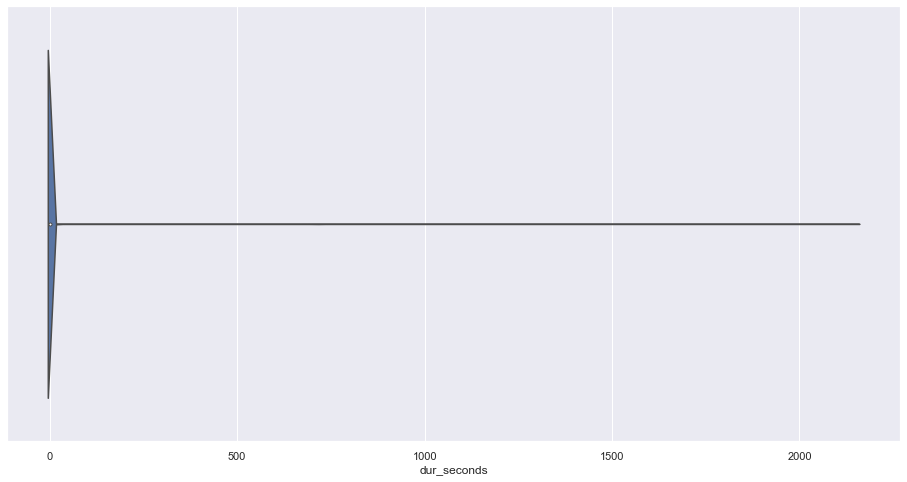

In [134]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

ax = sns.violinplot(x=df['dur_seconds'])

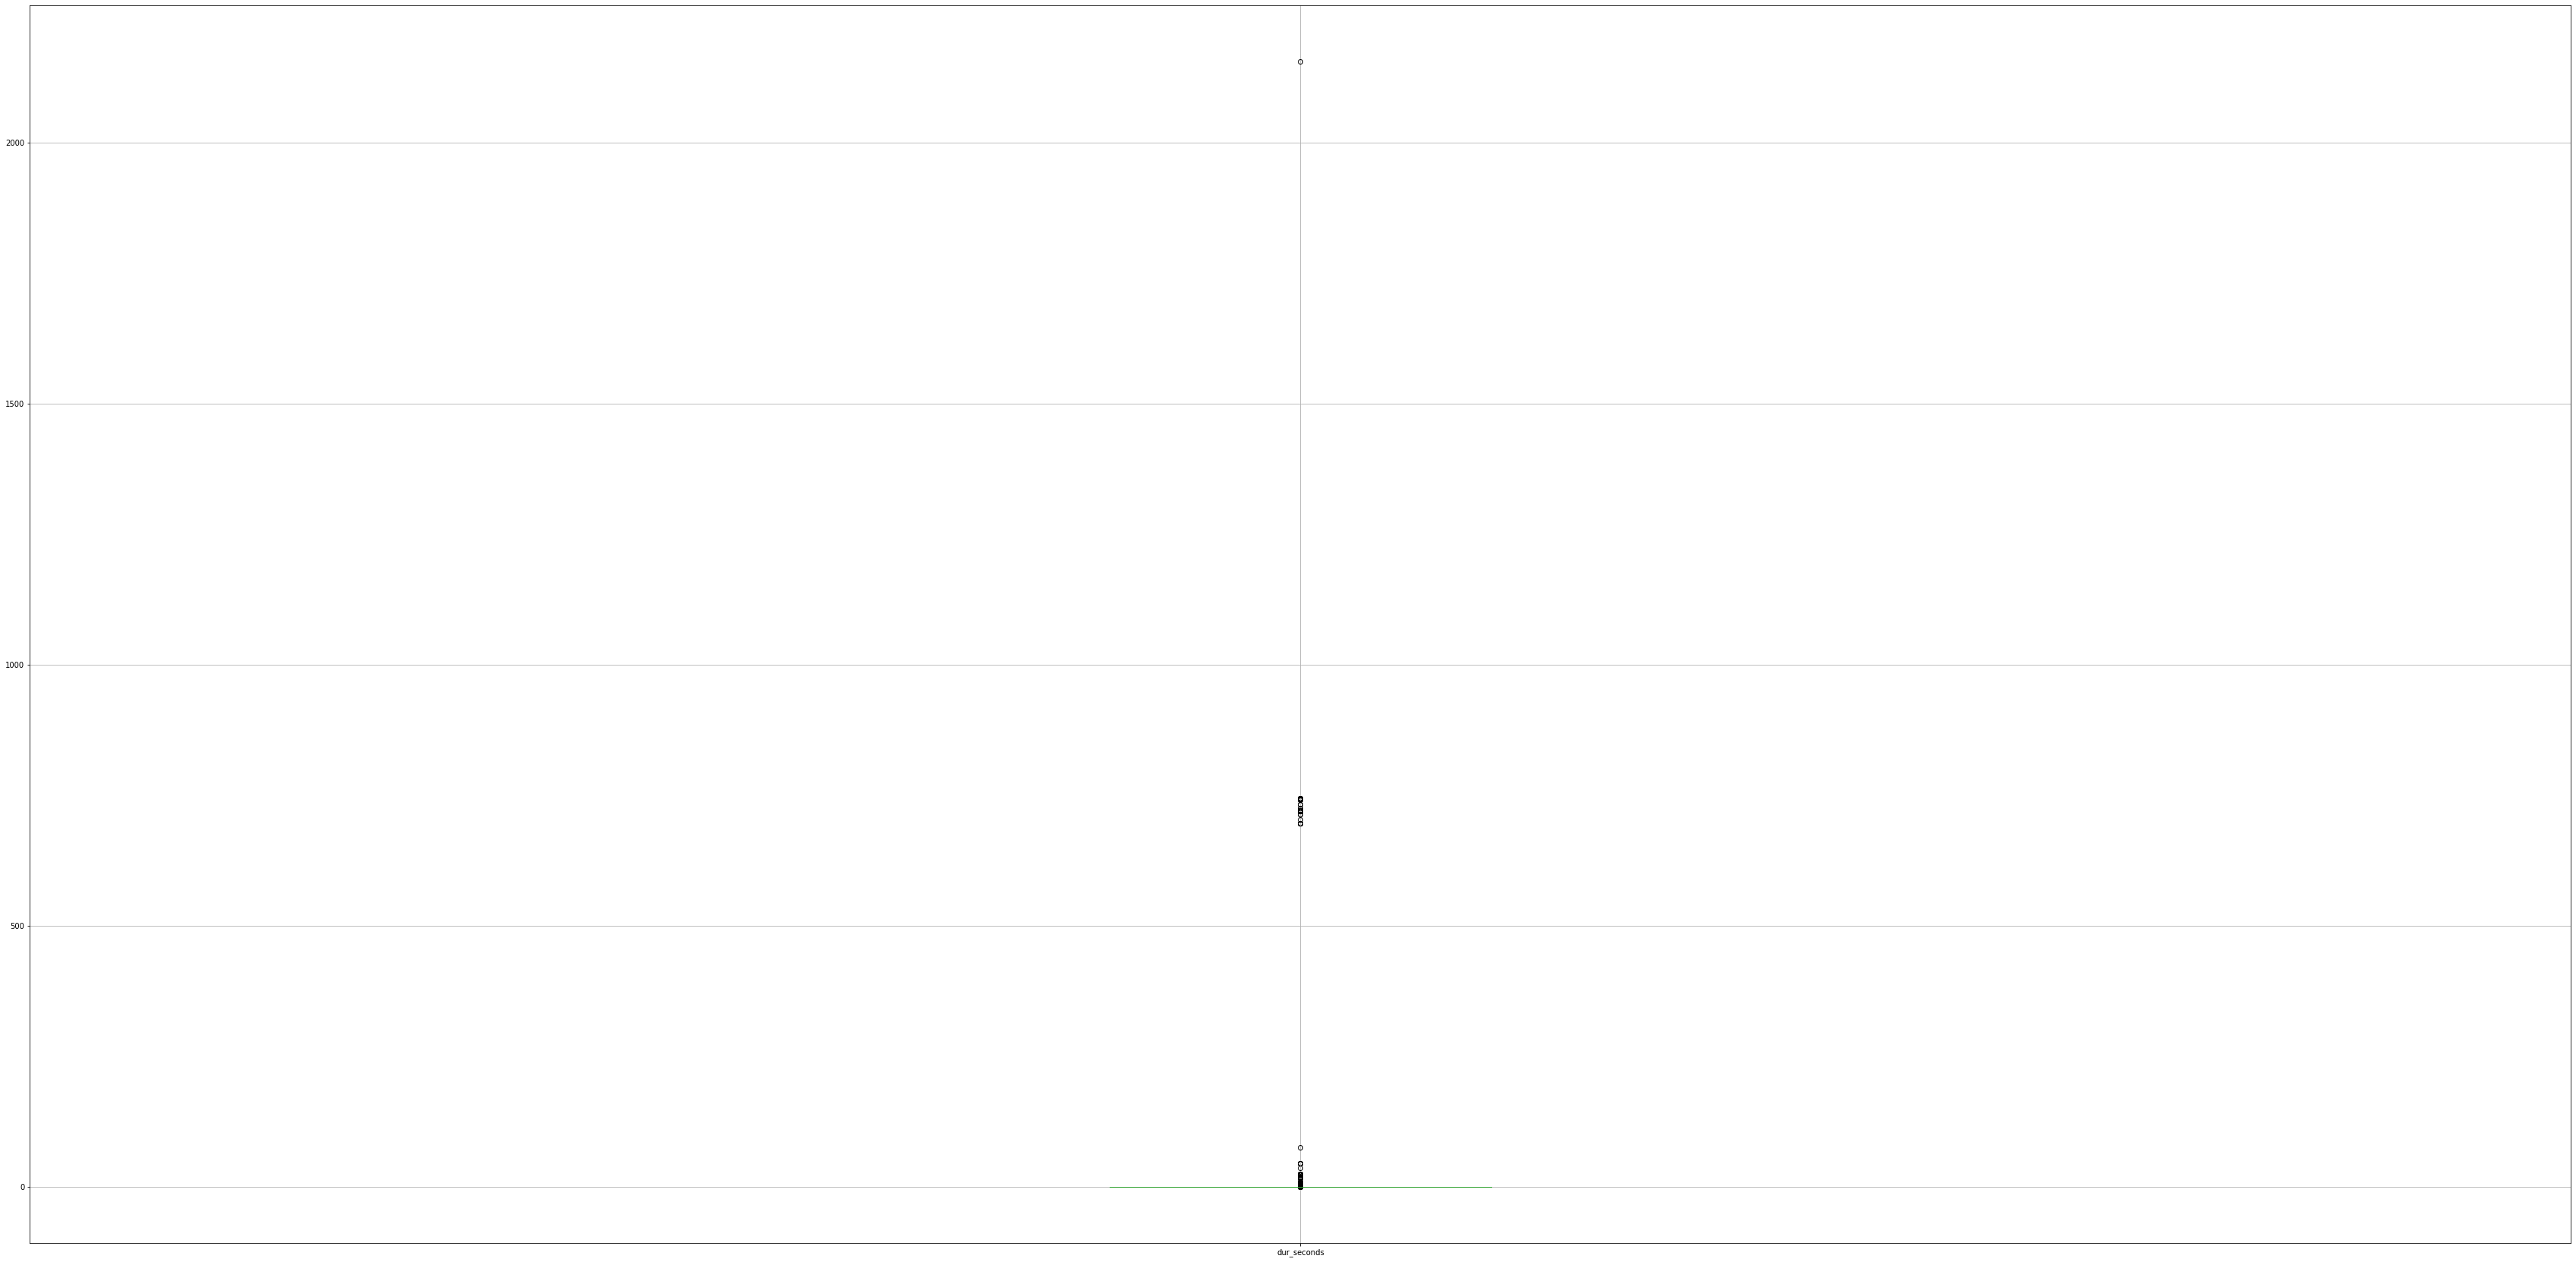

In [104]:
ax = df.boxplot(column=['dur_seconds'], figsize=(60,30))
#ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('boxplot.png')

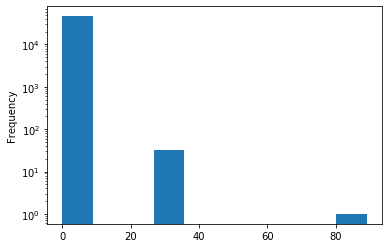

In [105]:
df['duration'].astype('timedelta64[D]').plot.hist(log=True)

In [106]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df['duration'].dt.total_seconds())) < 3).all(axis=1)]

AxisError: axis 1 is out of bounds for array of dimension 1

In [66]:
df['duration'].dt.total_seconds()

8         120.0
9         120.0
20        120.0
25        120.0
26        180.0
          ...  
117433    120.0
117434    360.0
117436    240.0
117438    300.0
117439    120.0
Name: duration, Length: 46429, dtype: float64

In [15]:
from scipy import stats
import numpy as np
df = df[np.abs(stats.zscore(df['duration'].dt.total_seconds()))<3]

NameError: name 'np' is not defined

In [109]:
df['dur_seconds'] = df['duration'].dt.total_seconds()/3600

C:\Users\pm18419.CORP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


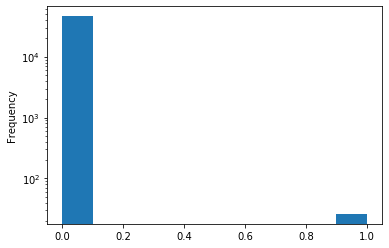

In [112]:
df['duration'].astype('timedelta64[D]').plot.hist(log=True)

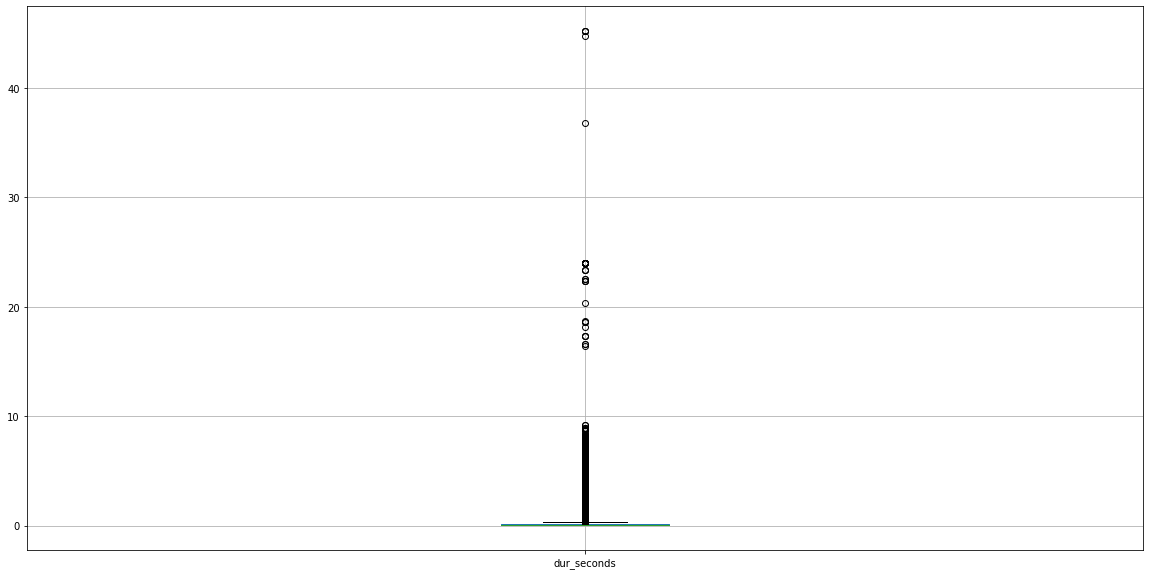

In [111]:
ax = df.boxplot(column=['dur_seconds'], figsize=(20,10))
#ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('boxplot.png')

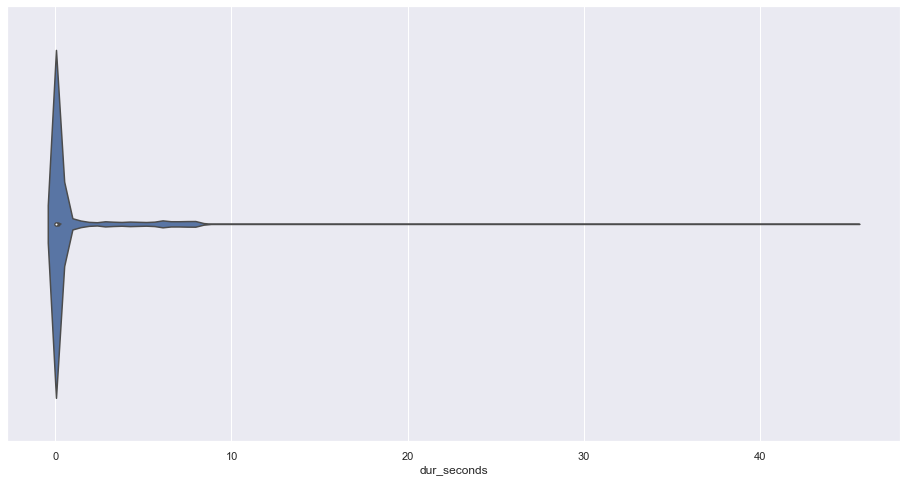

In [118]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

ax = sns.violinplot(x=df['dur_seconds'])
#sns.violinplot(x="day", y="total_bill", data=tips)

In [116]:
ax.fi